# Very simple illiustration of EM algorithm

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import matplotlib.pyplot as pp

# For reproducible results

In [6]:
np.random.seed(111)

# Setting up the two distributions

In [7]:
# set parameters
dist1_mean = 2
dist1_std = 1

dist2_mean = 5
dist2_std = .6

# Drawing 20 samples from each distribution
dist1 = np.random.normal(dist1_mean, dist1_std, size=20)
dist2 = np.random.normal(dist2_mean, dist2_std, size=20)

#mixing the two distirbutions
mixed = np.sort(np.concatenate((dist1, dist2)))

# Lets plot the two distributions

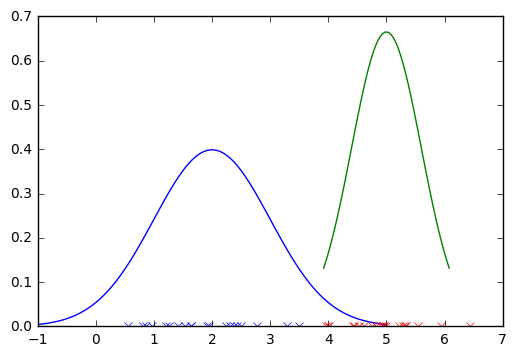

In [12]:
val=0
x = np.linspace(dist1_mean-3*pow(dist1_std,2),dist1_mean+3*pow(dist1_std,2), 100)
plt.plot(x,mlab.normpdf(x, dist1_mean, dist1_std,))
pp.plot(dist1, np.zeros_like(dist1) + val, 'x',color="blue")

x = np.linspace(dist2_mean-3*pow(dist2_std,2),dist2_mean+3*pow(dist2_std,2), 100)
plt.plot(x,mlab.normpdf(x, dist2_mean, dist2_std,))
pp.plot(dist2, np.zeros_like(dist2) + val, 'x',color="red")

plt.show()

# Now Let's assume that we dont know any thing about the distributions and guess for mean and std for each

In [13]:
# estimates for the mean
dist1_mean_guess = 1.1
dist2_mean_guess = 2

# estimates for the standard deviation
dist1_std_guess = 2
dist2_std_guess = 4

# Lets plot the curves again

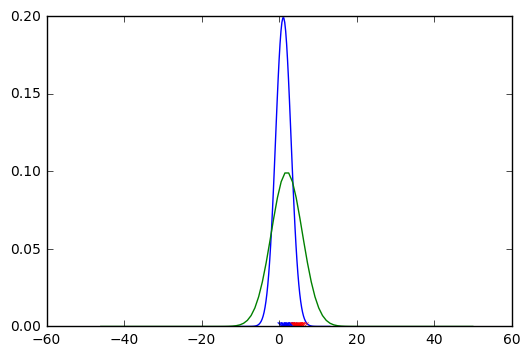

In [14]:
x = np.linspace(dist1_mean_guess-3*pow(dist1_std_guess,2),dist1_mean_guess+3*pow(dist1_std_guess,2), 100)
plt.plot(x,mlab.normpdf(x, dist1_mean_guess, dist1_std_guess,))
pp.plot(dist1, np.zeros_like(dist1) + val, 'x',color="blue")

x = np.linspace(dist2_mean_guess-3*pow(dist2_std_guess,2),dist2_mean_guess+3*pow(dist2_std_guess,2), 100)
plt.plot(x,mlab.normpdf(x, dist2_mean_guess, dist2_std_guess,))
pp.plot(dist2, np.zeros_like(dist2) + val, 'x',color="red")

plt.show()

This is seems to be very bad approximation. Lets recompute likelihoods

# The next step (step 2) is to compute the likelihood of each data point appearing under the current parameter guesses:

In [31]:
likelihood_of_dist1 = stats.norm(dist1_mean_guess, dist1_std_guess).pdf(mixed)
likelihood_of_dist2 = stats.norm(dist2_mean_guess, dist2_std_guess).pdf(mixed)

# For each data point, we can turn these two likelihood values into weights (step 3) so that they sum to 1 as follows:

In [32]:
likelihood_total = likelihood_of_dist1 + likelihood_of_dist2

dist1_weight = likelihood_of_dist1 / likelihood_total
dist2_weight = likelihood_of_dist2 / likelihood_total

# With our current estimates and our newly-computed weights, we can now compute new estimates for the mean and standard deviation of the red and blue groups (step 4).

In [33]:
def estimate_mean(data, weight):
    return np.sum(data * weight) / np.sum(weight)

def estimate_std(data, weight, mean):
    variance = np.sum(weight * (data - mean)**2) / np.sum(weight)
    return np.sqrt(variance)

In [34]:
# new estimates for standard deviation
dist1_std_guess = estimate_std(mixed, dist1_weight, dist1_mean_guess)
dist2_std_guess = estimate_std(mixed, dist2_weight, dist2_mean_guess)

# new estimates for mean
dist1_mean_guess = estimate_mean(mixed, dist1_weight)
dist2_mean_guess = estimate_mean(mixed, dist2_weight)

# Lets try to plot the curves now and see how good our new parameters are

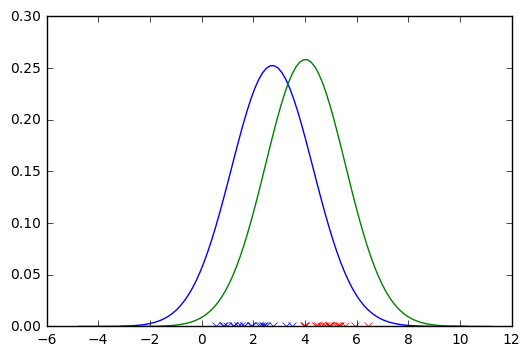

In [40]:
x = np.linspace(dist1_mean_guess-3*pow(dist1_std_guess,2),dist1_mean_guess+3*pow(dist1_std_guess,2), 100)
plt.plot(x,mlab.normpdf(x, dist1_mean_guess, dist1_std_guess,))
pp.plot(dist1, np.zeros_like(dist1) + val, 'x',color="blue")

x = np.linspace(dist2_mean_guess-3*pow(dist2_std_guess,2),dist2_mean_guess+3*pow(dist2_std_guess,2), 100)
plt.plot(x,mlab.normpdf(x, dist2_mean_guess, dist2_std_guess,))
pp.plot(dist2, np.zeros_like(dist2) + val, 'x',color="red")

plt.show()

This looks good, and few more iterations can make it better

# Compare new means and stds

In [44]:
print '-------------------------------------------------------'
print '-------------------------------------------------------'
print 'original std of dist1                     :',dist1_std
print 'std of dist1 after some iterations        :',dist1_std_guess
print 'original mean of dist1                    :',dist1_mean
print 'mean of dist1 after some iterations       :',dist1_mean_guess
print '-------------------------------------------------------'
print 'original std of dist2                     :',dist2_std
print 'std of dist2 after some iterations        :',dist2_std_guess
print 'original mean of dist2                    :',dist2_mean
print 'mean of dist2 after some iterations       :',dist2_mean_guess
print '-------------------------------------------------------'
print '-------------------------------------------------------'

-------------------------------------------------------
-------------------------------------------------------
original std of dist1                     : 1
std of dist1 after some iterations        : 1.57953470595
original mean of dist1                    : 2
mean of dist1 after some iterations       : 2.73898155342
-------------------------------------------------------
original std of dist2                     : 0.6
std of dist2 after some iterations        : 1.54400309905
original mean of dist2                    : 5
mean of dist2 after some iterations       : 4.02261717924
-------------------------------------------------------
-------------------------------------------------------
